In [51]:
//Converting json into CSV
#import pandas as pd
#df = pd.read_json ("movies_db_ML.json")
#df.to_csv ("movies_db_ML_1.csv", index = None)



Number of data used for training
(3971, 5)
The Coefficient is: 
[[ 1.68245482e-05 -1.27780737e-05  9.45833689e-07  9.95520751e-04
  -1.05578192e-08]]
The Slope is: 
1.0043748605672686e-07
Accuracy:  0.7424471299093656


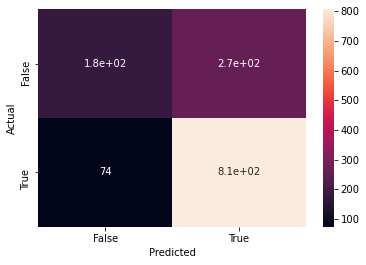

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
df = pd.read_csv('moviesDatabase.csv')

features_taken=['results/features/0/genre_ids', 
            'results/features/0/production_companies/0', 
            'results/features/0/vote_average', 
            'results/features/0/vote_count',
           'results/features/0/budget']

x_dummy = pd.get_dummies(df.loc[:,features_taken])

x = df[features_taken].values
y = df['labels']


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
log_reg = LogisticRegression(penalty='none',solver='lbfgs')
log_reg.fit(x_train, y_train)
y_pred=log_reg.predict(x_test)

#Total Training data
print('Number of data used for training')

print(x_train.shape)

# Retrieve the model parameters.
b = log_reg.intercept_[0]
w2 = log_reg.coef_
# Calculate the intercept and gradient of the decision boundary.
print('The Coefficient is: ')
print(w2)

print('The Slope is: ')
print(b)
import seaborn as sn

from sklearn import metrics

#Confusion matrix plotting 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()







Accuracy:  0.6646525679758308


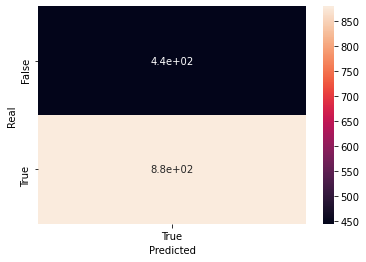

In [3]:


#Predicting against a baseline : DummyClassifier 

x1 = df[features_taken].values
y1 = df['labels']


x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=1)
from sklearn.dummy import DummyClassifier
dummy_regr = DummyClassifier(strategy='prior', random_state=None, constant=None)
dummy_regr.fit(x_train1, y_train1)
y_pred1=dummy_regr.predict(x_test1)




import matplotlib.pyplot as plt1
import seaborn as sn

from sklearn import metrics

#Confusion matrix plotting 
confusion_matrix1 = pd.crosstab(y_test1, y_pred1, rownames=['Real'], colnames=['Predicted'])
sn.heatmap(confusion_matrix1, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test1, y_pred1))
plt1.show()







In [38]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(x_train, y_train)


LogisticRegression(C=0.1)

In [6]:

#The AUC value and ROC Curves 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
model = LogisticRegression(penalty='l2', C=0.1)

# calculate roc curve
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)


auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('AUC: %.3f' % auc)
#ns_ = No Skills Classifier probability, LR_= Linear Regression Probability
model.fit(x_train, y_train)
noSkillClassifierProbs = [0 for _ in range(len(y_test))]
linearRegressionProbs = model.predict_proba(x_test)[::,1]
ns_auc = roc_auc_score(y_test, noSkillClassifierProbs)
lr_auc = roc_auc_score(y_test, linearRegressionProbs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, noSkillClassifierProbs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, linearRegressionProbs)
# ROC Curve Model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='ROC Curve')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
 
#Citation: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.